In [1]:
import sys
import os.path
import pylab as plt
from zedstat import zedstat 
import pandas as pd
plt.style.use('fivethirtyeight')
from jupyterthemes import jtplot
jtplot.style()

#

# Suicidality Prevalence

The prevalence of suicide in the general public is 13.5 out of 10K, and in the Veteran population is 31.7 out of 10K. Centers for Disease Control and Prevention (CDC) reported that, according to a nationwide survey of adults in the United States (the National Survey on Drug Use and Health), about 4.8% of U.S. adults aged 18 and older had thoughts about suicide (Suicidal ideation) in the past year, based on data collected in 2019. The National Survey on Drug Use and Health (NSDUH) data from 2019 indicates higher rates of suicidal thoughts among adults who identify as two or more races (4.8%), white (4.4%), and black (4.0%), with slightly lower rates for Hispanic adults (3.5%)~\cite{NSDUH2003}. So it follows that a population prevalence of 4% in a majority African-American population is a valid lower-bound to prevalence of SI.

We will compute an estimate of Number Needed to Screen (NNS) is addition to other performance metrics in the following script for ZCoR-SISA. We will need to make several assumptions in NNS computation.

+ **Odds of an SA if one is experiencing SI** A study published in JAMA Psychiatry in 2013 analyzed a survey of adults in the United States and found that approximately 10.6% of respondents reported having suicidal thoughts in their lifetime, and 4.6% reported having made a suicide attempt. This suggests that, roughly, around 43% of individuals with lifetime suicidal ideation reported a suicide attempt. However, this percentage is likely to vary widely in different populations and settings~\cite{nock2008suicide,nock2013prevalence}.
+ **Effectiveness of interventions** It is estimated that cognitive-behavioural therapy (CBT)-based psychological treatment was associated with significant reductions in suicide attempts and deaths by suicide. The estimated odds ratio (OR) was 0·47 for suicide attempts (95% CI 0·30–0·73) and 0·20 for suicide (0·09–0·42)~\cite{riblet2017strategies,meerwijk2016direct}.

+ More than 60% of individuals who progress from thinking about suicide to attempting suicide will do so within the first year after the onset of suicide ideation~\cite{ref6,ref9,ref11}, suggesting that the year after the first onset of suicide ideation is a particularly high-risk time. 

```

@article{NSDUH2003,
  title = {The NSDUH report},
  author = {{National Survey on Drug Use and Health (U.S.)} and {United States Substance Abuse and Mental Health Services Administration Office of Applied Studies}},
  year = {2003-2009},
  language = {eng},
  issn = {1559-4386},
  url = {https://purl.fdlp.gov/GPO/LPS77578}
}

@article{nock2008suicide,
  title={Suicide and suicidal behavior},
  author={Nock, Matthew K and Borges, Guilherme and Bromet, Evelyn J and Cha, Christine B and Kessler, Ronald C and Lee, Sing},
  journal={Epidemiologic reviews},
  volume={30},
  number={1},
  pages={133--154},
  year={2008},
  publisher={Oxford University Press}
}

@article{nock2013prevalence,
  title={Prevalence, correlates, and treatment of lifetime suicidal behavior among adolescents: Results from the National Comorbidity Survey Replication Adolescent Supplement},
  author={Nock, Matthew K and Green, Jennifer Greif and Hwang, Irving and McLaughlin, Katie A and Sampson, Nancy A and Zaslavsky, Alan M and Kessler, Ronald C},
  journal={JAMA psychiatry},
  volume={70},
  number={3},
  pages={300--310},
  year={2013},
  publisher={American Medical Association}
}

@article{riblet2017strategies,
  title={Strategies to prevent death by suicide: meta-analysis of randomised controlled trials},
  author={Riblet, Nathaniel B.V. and Shiner, Brian and Young-Xu, Yinong and Watts, Bradley V.},
  journal={The British Journal of Psychiatry},
  volume={210},
  number={6},
  pages={396--402},
  year={2017},
  publisher={Cambridge University Press}
}

@article{meerwijk2016direct,
  title={Direct versus indirect psychosocial and behavioural interventions to prevent suicide and suicide attempts: a systematic review and meta-analysis},
  author={Meerwijk, Esther L. and Parekh, Amrita and Oquendo, Maria A. and Allen, Isabel E. and Franck, Linda S. and Lee, Kathryn A.},
  journal={The Lancet Psychiatry},
  volume={3},
  number={6},
  pages={544--554},
  year={2016},
  publisher={Elsevier}
}

@article{ref6,
    author = "Nock, M.K. and Borges, G. and Bromet, E.J. and others",
    title = "Cross-national prevalence and risk factors for suicidal ideation, plans and attempts",
    journal = "Br J Psychiatry",
    year = "2008",
    volume = "192",
    pages = "98–105",
}

@article{ref9,
    author = "Kessler, R.C. and Borges, G. and Walters, E.E.",
    title = "Prevalence of and risk factors for lifetime suicide attempts in the National Comorbidity Survey",
    journal = "Arch Gen Psychiatry",
    year = "1999",
    volume = "56",
    pages = "617–626",
}


@article{ref11,
    author = "Nock, M.K. and Green, J.G. and Hwang, I. and others",
    title = "Prevalence, correlates and treatment of lifetime suicidal behavior among adolescents: results from the National Comorbidity Survey Replication Adolescent Supplement",
    journal = "JAMA Psychiatry",
    year = "2013",
    volume = "70",
    pages = "300–310",
}



```




## NNS estimation

We assume that the adverse event we are aiming to avaoid is SA. We need to calculate the "survival rate" for SA. This is assumed to be same as the
effectiveness of avoiding SA from the data above, ie 0.47. This represents the fraction who, if under heathcare attentions, succeed in avoiding the adverse event (similar to 
surviving beyond 5 years when under cancer treatment). We need another parameter: the F, which estimates the fraction of the TP who will experience adverse event, which if we are considering SA as the adverse event, and flagging SI/SA, maybe estimated approximately from the data above as 43%. But other evidnce (bullet 3), suggests if we are interested in estimating this effect over a short term (~1year), then this fraction is ~60%.


In [2]:
F=0.21*(0.95-0.69) + 0.08*(0.95-0.17)
F=0.33*(0.95-0.17)
surv_rate=0.81 # .30 to .73 95% cf
surv_rate_lb=0.80 # .30 to .73 95% cf
surv_rate_ub=0.82 # .30 to .73 95% cf


In [3]:
prev_lower_bnd=0.004
#data='/home/ishanu/Dropbox/ZED/Research/CDMRPgrants/TBI/data/CURVES/SISA/National_ROC_CURVE_Female.csv'
data='/home/ishanu/Dropbox/ZED/Research/CDMRPgrants/KPgrant/data/CURVES/CANCER_UTERUS/National_ROC_CURVE_Female.csv'

zt=zedstat.processRoc(df=pd.read_csv(data),
           order=3, 
           total_samples=1.2*1e6,
           positive_samples=8400,
           alpha=0.01,
           prevalence=prev_lower_bnd)

In [4]:
# compute smoothened roc and other performance measures
zt.smooth(STEP=0.001)
zt.allmeasures(interpolate=True)
zt.usample(precision=3)
zt.getBounds()

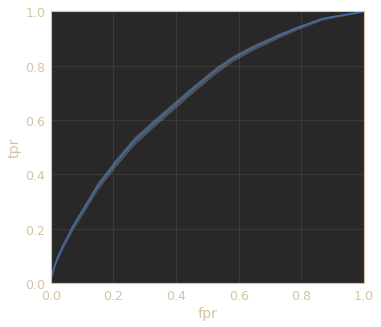

In [5]:
plt.figure(figsize=[5,5])
ax=plt.gca()
ax=zt.get().tpr.plot(ax=ax)
plt.fill_between(x=zt.get().index, y1=zt.df_lim['U'].tpr,y2=zt.df_lim['L'].tpr, color='w',alpha=.2)
ax.set_xlim(0,1)
ax.set_ylim(0,1)
ax.set_ylabel('tpr');

In [6]:
zt.auc()

(0.6878513293543136, 0.6977953763044031, 0.677907282404224)

<AxesSubplot:xlabel='LR-'>

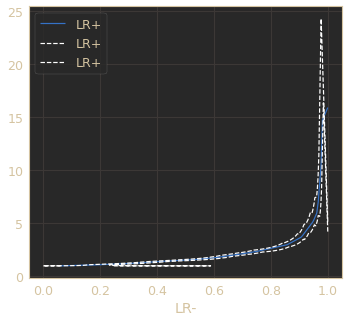

In [7]:
zf=zt.get()
zfu=zt.df_lim['U']
zfl=zt.df_lim['L']
plt.figure(figsize=[5,5])
ax=plt.gca()
ax=zf.plot(ax=ax,x='LR-',y='LR+')
zfu.plot(ax=ax,x='LR-',y='LR+',style='--w')
zfl.plot(ax=ax,x='LR-',y='LR+',style='--w')
#ax.set_xlim(0.01,.98)
#ax.set_ylim(0,1)
#ax.set_ylabel('tpr');

In [8]:
ZU=zf+(zfu-zfl)/2
ZL=zf-(zfu-zfl)/2
Z=zf.join(ZU,rsuffix='_upper').join(ZL,rsuffix='_lower')
#ax=Z.plot(x='LR-',y='LR+')
#ax=Z.plot(ax=ax,x='LR-U',y='LR+U')
#ax=Z.plot(ax=ax,x='LR-L',y='LR+L')


In [9]:
Z

,tpr,ppv,acc,npv,LR+,LR-,threshold,tpr_upper,ppv_upper,acc_upper,...,LR+_upper,LR-_upper,threshold_upper,tpr_lower,ppv_lower,acc_lower,npv_lower,LR+_lower,LR-_lower,threshold_lower
fpr,,,,,,,,,,,,,,,,,,,,,
0.000,0.000000,0.026357,0.996000,0.996000,15.934961,1.000000,1.029406,0.000000,0.040660,0.996000,...,16.404665,1.000000,1.029406,0.000000,0.012054,0.996000,0.996000,15.465257,1.000000,1.029406
0.001,0.020347,0.026311,0.994594,0.996075,14.723411,0.981117,0.008912,0.024315,0.039933,0.994610,...,18.691364,0.977145,0.008912,0.016379,0.012689,0.994578,0.996059,10.755459,0.985089,0.008912
0.002,0.026135,0.026271,0.993290,0.996093,10.550397,0.976615,0.007363,0.030619,0.034399,0.993308,...,12.792252,0.972122,0.007363,0.021651,0.018142,0.993272,0.996075,8.308543,0.981107,0.007363
0.003,0.029481,0.026245,0.992473,0.996103,9.666337,0.974067,0.007050,0.034235,0.032135,0.992492,...,11.250970,0.969299,0.007050,0.024727,0.020355,0.992454,0.996084,8.081704,0.978835,0.007050
0.004,0.032827,0.026220,0.991657,0.996113,8.782277,0.971519,0.006738,0.037835,0.030932,0.991677,...,10.034220,0.966491,0.006738,0.027819,0.021507,0.991636,0.996093,7.530334,0.976547,0.006738
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0.996,0.999218,0.000000,0.007973,0.999739,1.003610,0.064777,0.003126,1.000004,0.000003,0.007976,...,1.004399,-0.131197,0.003126,0.998432,-0.000003,0.007970,0.998951,1.002821,0.260751,0.003126
0.997,0.999413,0.000000,0.006980,0.999744,1.002707,0.063551,0.003126,1.000094,0.000003,0.006982,...,1.003390,-0.147627,0.003126,0.998733,-0.000003,0.006977,0.998834,1.002025,0.274729,0.003126
0.998,0.999609,0.000000,0.005986,0.999748,1.001805,0.062325,0.003126,1.000165,0.000002,0.005989,...,1.002362,-0.174355,0.003126,0.999053,-0.000002,0.005984,0.998634,1.001248,0.299006,0.003126


In [10]:
Z.to_csv(data.replace('.csv','X.csv'))

In [11]:
zt.get()

,tpr,ppv,acc,npv,LR+,LR-,threshold
fpr,,,,,,,
0.000,0.000000,0.026357,0.996000,0.996000,15.934961,1.000000,1.029406
0.001,0.020347,0.026311,0.994594,0.996075,14.723411,0.981117,0.008912
0.002,0.026135,0.026271,0.993290,0.996093,10.550397,0.976615,0.007363
0.003,0.029481,0.026245,0.992473,0.996103,9.666337,0.974067,0.007050
0.004,0.032827,0.026220,0.991657,0.996113,8.782277,0.971519,0.006738
...,...,...,...,...,...,...,...
0.996,0.999218,0.000000,0.007973,0.999739,1.003610,0.064777,0.003126
0.997,0.999413,0.000000,0.006980,0.999744,1.002707,0.063551,0.003126
0.998,0.999609,0.000000,0.005986,0.999748,1.001805,0.062325,0.003126


In [17]:
zt.operating_zone(LRminus=.9,LRplus=2)
#display(zt._operating_zone)
rf0,txt0,resdf0=zt.interpret(fpr=zt._operating_zone.fpr.values[0],number_of_positives=100,
                      five_yr_survival=surv_rate,factor=F)

rf0,txt0lb,resdf0lb=zt.interpret(fpr=zt._operating_zone.fpr.values[0],number_of_positives=100,
                      five_yr_survival=surv_rate_lb,factor=F)

rf0,txt0ub,resdf0ub=zt.interpret(fpr=zt._operating_zone.fpr.values[0],number_of_positives=100,
                      five_yr_survival=surv_rate_ub,factor=F)


rf1,txt1,resdf1=zt.interpret(fpr=zt._operating_zone.fpr.values[1],number_of_positives=100,
                      five_yr_survival=surv_rate,factor=F)
rf1,txt1,resdf1ub=zt.interpret(fpr=zt._operating_zone.fpr.values[1],number_of_positives=100,
                      five_yr_survival=surv_rate_ub,factor=F)
rf1,txt1,resdf1lb=zt.interpret(fpr=zt._operating_zone.fpr.values[1],number_of_positives=100,
                      five_yr_survival=surv_rate_lb,factor=F)
print('high precision operation:\n','\n '.join(txt0))
print('\n')
print('high recall operation:\n','\n '.join(txt1))
zop=zt._operating_zone
zop['NNS'] = [resdf0ub.T.NNS.values[0],resdf1ub.T.NNS.values[0]]
display(zop)

display(resdf0lb)
display(resdf0)
display(resdf0ub)
display(resdf1)
display(resdf1lb)
display(resdf1ub)


high precision operation:
 For every 100 positive instances
 we raise 553 flags,
 out of which 14 are true positives
 540 are false alarms
 86 cases are missed
 Number needed to screen is 820


high recall operation:
 For every 100 positive instances
 we raise 2624 flags,
 out of which 50 are true positives
 2575 are false alarms
 50 cases are missed
 Number needed to screen is 1028


,fpr,tpr,ppv,acc,npv,LR+,LR-,threshold,NNS
high precision,0.037,0.134152,0.025199,0.958812,0.996399,3.603553,0.899768,0.004823,865.0
high sensitivity,0.251,0.503261,0.018680,0.748005,0.997344,2.005551,0.663154,0.004033,1142.0


,estimates
POS,100.00
TP,14.00
FP,540.00
NEG,24900.00
FLAGS,553.00
FN,86.00
TN,24360.00
NNS,779.00
flagged_fraction,0.02


,estimates
POS,100.00
TP,14.00
FP,540.00
NEG,24900.00
FLAGS,553.00
FN,86.00
TN,24360.00
NNS,820.00
flagged_fraction,0.02


,estimates
POS,100.00
TP,14.00
FP,540.00
NEG,24900.00
FLAGS,553.00
FN,86.00
TN,24360.00
NNS,865.00
flagged_fraction,0.02


,estimates
POS,100.0
TP,50.0
FP,2575.0
NEG,24900.0
FLAGS,2624.0
FN,50.0
TN,22325.0
NNS,1082.0
flagged_fraction,0.1


,estimates
POS,100.0
TP,50.0
FP,2575.0
NEG,24900.0
FLAGS,2624.0
FN,50.0
TN,22325.0
NNS,1028.0
flagged_fraction,0.1


,estimates
POS,100.0
TP,50.0
FP,2575.0
NEG,24900.0
FLAGS,2624.0
FN,50.0
TN,22325.0
NNS,1142.0
flagged_fraction,0.1


## writing tables to latex

In [13]:
from zedstat.textable import textable
#textable(zt.get(),tabname='table.tex',FORMAT='%1.1f',TABFORMAT='L{1in}|L{1in}|L{1in}|L{1in}|L{1in}|L{1in}|L{1in}|L{1in}',LNTERM='\\\\\n')

In [14]:
#pd.options.display.html.use_mathjax = False
from zedstat.textable import tablewithbounds
xf=tablewithbounds(zt.get(),zt.usample(zt.df_lim['U']),zt.usample(zt.df_lim['L']))#.to_csv('table.csv')
xf.loc[zt._operating_zone.fpr.values]

,tpr,ppv,acc,npv,LR+,LR-,threshold
fpr,,,,,,,
0.001,$0.020 \pm 0.003$,$0.026 \pm 0.013$,$0.994 \pm 1.587$,$0.996 \pm 1.582$,$14.72 \pm 3.967$,$0.981 \pm 0.003$,0.008912
0.006,$0.039 \pm 0.005$,$0.026 \pm 0.002$,$0.990 \pm 2.190$,$0.996 \pm 2.195$,$7.014 \pm 0.912$,$0.966 \pm 0.005$,0.006113


In [15]:
from zedstat.textable import textable
textable(xf,tabname='tmp.tex',FORMAT='%1.3f',INDEX=True,LNTERM='\\\\\\hline\n')     

In [16]:
! cat tmp.tex


\begin{tabular}{L{1in}|L{1in}|L{1in}|L{1in}|L{1in}|L{1in}|L{1in}|L{1in}}\hline
fpr&tpr&ppv&acc&npv&LR+&LR-&threshold\\\hline
0.000& $0.0  \pm  0.0$ & $0.026  \pm  0.014$ & $0.996  \pm  0.0$ & $0.996  \pm  0.0$ & $15.93  \pm  0.469$ & $1.0  \pm  0.0$ &1.029\\\hline
0.001& $0.020  \pm  0.003$ & $0.026  \pm  0.013$ & $0.994  \pm  1.587$ & $0.996  \pm  1.582$ & $14.72  \pm  3.967$ & $0.981  \pm  0.003$ &0.009\\\hline
0.002& $0.026  \pm  0.004$ & $0.026  \pm  0.008$ & $0.993  \pm  1.793$ & $0.996  \pm  1.790$ & $10.55  \pm  2.241$ & $0.976  \pm  0.004$ &0.007\\\hline
0.003& $0.029  \pm  0.004$ & $0.026  \pm  0.005$ & $0.992  \pm  1.901$ & $0.996  \pm  1.900$ & $9.666  \pm  1.584$ & $0.974  \pm  0.004$ &0.007\\\hline
0.004& $0.032  \pm  0.005$ & $0.026  \pm  0.004$ & $0.991  \pm  2.003$ & $0.996  \pm  2.003$ & $8.782  \pm  1.251$ & $0.971  \pm  0.005$ &0.007\\\hline
0.005& $0.036  \pm  0.005$ & $0.026  \pm  0.003$ & $0.990  \pm  2.099$ & $0.996  \pm  2.101$ & $7.898  \pm  1.049$ & $0.968  \p